# Lab 4
## Setup & Constants
Even if you may not need them each time, constants like kt, etc should generally be included

**Note:** the usual value for b assumes a freely rotating shaft and collar.  We obviously don't have that this time so we will find it experimentally in the last section.

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
from ipywidgets import *
from control.matlab import *
from math import pi, sqrt
import numpy as np
from scipy.io import loadmat

In [2]:
# motor torque constant (N-m/A)
kt = 0.05

# degrees to radians
kdr = 2*pi/360

# vector of current commands to try in motorlab
i = [-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2] 
# vector of position data - determined from motorlab
angle = [-29.7, -20.7, -14.85, -6.97, 0, 6.75, 14.85, 23.4, 30.15]

# convert deg to rad
theta = [kdr * x for x in angle]

# convert current vector to torque vector
T = [kt * x for x in i]

## Torque vs Angular Position Experimental and Estimated Plot
* Collect a squarewave response from the motorlab as described in the handout
* Be sure to name the variable "stepdata" so that the code matches your data
* Remember to set the *Sample Rate* to 500 Hz, then press the *Calculate Step Response Timing* before collecting stepdata

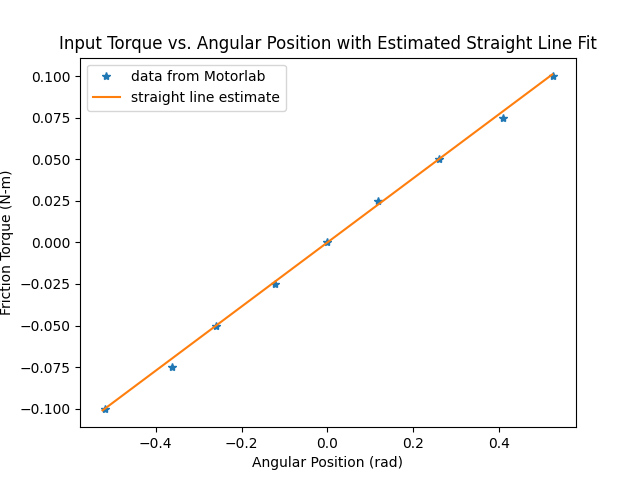

In [3]:
# generate two points for straight line fit
# the spring isn't likely to move more than 30 degrees

# angle estimate
theta_estimate = [(pi/180) * x for x in [-30, 30]]

# What is the slope of our motorlab theta vs torque?
# first order polynomial fit (returns slope and intercept)
fit = np.polyfit(theta, T, 1)

# slope is first element
k_estimate = fit[0]

# Torque estimate using slope found above
T_estimate = [k_estimate * x for x in theta_estimate]
 
# plot straight line with data
plt.figure(1)
plt.plot(theta, T, '*', theta_estimate, T_estimate)
plt.ylabel('Friction Torque (N-m)')
plt.xlabel('Angular Position (rad)')
plt.title('Input Torque vs. Angular Position with Estimated Straight Line Fit')
plt.legend(['data from Motorlab','straight line estimate'])
plt.show()

## Find Damping Ratio using Envelope Fit
Uncomment this section after completing the above section
* Estimate the damping ratio by fitting an envelope to the step response
* Requires step response data has been imported into stepdata
* Uncomment and complete the lines to find zeta

In [6]:
# motor inertia (kg-m^2 or N-m-s^2/rad)
J = 1.1e-5 + 0.19e-5

# spring constant (N-m/rad)
ks = k_estimate
 
# DC gain of transfer function
Kdc = kt/ks

# natural freqency (rad/s)
wn = sqrt(ks / J)

# estimated damping ratio
zeta_estimate = 0.05
 
# Generate a step response from a first order system with a pole
# equal to the real part of the 2nd order poles

def f(zeta_estimate):
    # real part of poles 
    real_part = zeta_estimate * wn

    envelope_TF = tf(Kdc * real_part, [1, real_part])
    envelope = step(envelope_TF)
    return envelope

[envelope_time, envelope_y] = f(0.05)
# Extract data from the experimentally generated step response
stepdata = loadmat("lab4Data")['stepdata']

# extract time column of the data matrix
dataTime = [x[0] for x in stepdata]

# extract third angle column of the data matrix
dataAngle = [x[2] for x in stepdata]

# convert to rad
dataTh = [kdr * x for x in dataAngle]
fig = plt.figure(2)
line, = plt.plot(envelope_time, envelope_y, '--')
# ax.ylabel('Angular Position (rad)')
# ax.xlabel('Time (sec)')
# ax.title('Step Response Data with Estimated Envelope')
# ax.legend(['step response from Motorlab','estimated envelope'])

def update(zeta_estimate = 0.05):
    line.set_data(f(zeta_estimate))
    display(fig)

interact(update, zeta_estimate = FloatSlider(min=0, max=1, step=0.001, value=0))

interactive(children=(FloatSlider(value=0.0, description='zeta_estimate', max=1.0, step=0.001), Output()), _do…

<function __main__.update(zeta_estimate=0.05)>